<a href="https://colab.research.google.com/github/mwinzie/Financial-Outcomes/blob/master/Moringa_Data_Science_Core_W1_Independent_Project_2019_08_Agnes_Mueni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing the pandas library
import pandas as pd

# Importing Numpy
import numpy as np

# Importing Matplotlib
import matplotlib.pyplot as plt

# Importing Seaborn
import seaborn as sns
%matplotlib inline

In [3]:
#installing the researchpy
pip install researchpy

## Reading the dataset

In [0]:
#loading the dataset

economic = pd.read_csv('Financial Dataset.csv')

## Checking the Dataset

In [131]:
# Determining the no. of records in our dataset

print('This dataset has ' + str(economic.shape[0]) + ' rows, and ' + str(economic.shape[1]) + ' columns')

This dataset has 23524 rows, and 13 columns


In [14]:
# Previewing the top of the dataset
economic.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
# Checking whether each column has an appropriate datatype
economic.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

## Tidying the Dataset

In [15]:
# Checking for Anomalies
#replacing ' '(space) with '_'
economic.columns = economic.columns.str.strip().str.replace(' ','_')
economic.columns

Index(['country', 'year', 'uniqueid', 'Has_a_Bank_account', 'Type_of_Location',
       'Cell_Phone_Access', 'household_size', 'Respondent_Age',
       'gender_of_respondent', 'The_relathip_with_head', 'marital_status',
       'Level_of_Educuation', 'Type_of_Job'],
      dtype='object')

In [16]:
#changing all columns names to lower case 
economic.columns = map(str.lower, economic.columns)
economic.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [17]:
#renaming column names 
economic.rename(columns= {'the_relathip_with_head':'relationship_with_head', 'level_of_educuation':'level_of _education'}, inplace = True)
economic.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'level_of _education', 'type_of_job'],
      dtype='object')

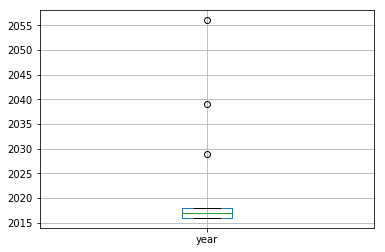

In [0]:
#Checking the dataset for outliers

economic.boxplot(["year"])

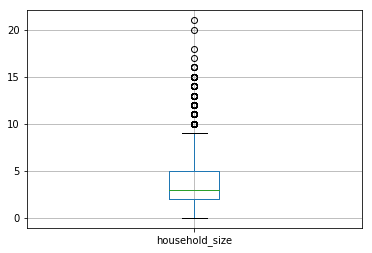

In [0]:
economic.boxplot(["household_size"])

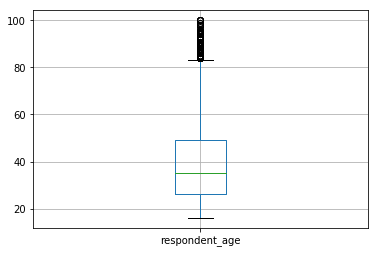

In [0]:
economic.boxplot(["respondent_age"])

In [0]:
#dropping the rows that are unnecessary 
economic.drop(['uniqueid'], axis = 1, inplace = True)

In [0]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = economic[economic.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

#cannot delete duplicate values from the dataset as they will be important for the model.

Duplicate Rows except first occurrence based on all columns are :
      country  year  ...              level_of _education                type_of_job
163     Kenya  2018  ...                Primary education              Self employed
229     Kenya  2018  ...              No formal education        Farming and Fishing
321     Kenya  2018  ...                Primary education              Self employed
482     Kenya  2018  ...                Primary education        Informally employed
599     Kenya  2018  ...                Primary education       Remittance Dependent
635     Kenya  2018  ...              Secondary education        Farming and Fishing
637     Kenya  2018  ...              Secondary education        Farming and Fishing
671     Kenya  2018  ...                Primary education       Remittance Dependent
688     Kenya  2018  ...              Secondary education        Farming and Fishing
795     Kenya  2018  ...                Primary education        Farming and Fishing

In [19]:
#checking for all unique values in the dataset
for i in economic.columns:
  print('\n')
  print(economic[i].unique())



['Kenya' 'Rwanda' 'Tanzania' nan 'Uganda']


[2018 2029 2056 2016 2039 2017]


['Yes' 'No' nan]


['Rural' 'Urban' nan]


['Yes' 'No' nan]


[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21. nan
  0. 18. 17. 20.]


[ 24.  70.  26.  34.  32.  42.  54.  76.  40.  69.  64.  31.  38.  47.
  27.  48.  25.  21.  18.  22.  58.  55.  62.  29.  35.  45.  67.  19.
  80.  66.  50.  33.  28.  51.  16.  17.  30.  37.  59.  65.  46.  56.
  52.  23.  43.  49.  44.  72.  53.  63.  39.  81.  78.  36.  20.  60.
  95.  71.  57.  85.  68.  41.  61.  75.  86.  73.  nan  93.  74.  88.
  90.  77.  84.  82.  89.  79.  83.  94.  87.  92.  91.  98.  97.  96.
  99. 100.]


['Female' 'Male' nan]


['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives' nan]


['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know' nan]


['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Ter

In [0]:
#dropping the years that do not fall under the research study
#assigning the variable x to years 
x = economic[economic['year'] > 2018].index
economic.drop(x, inplace = True)

In [21]:
economic.year.unique()

array([2018, 2016, 2017])

In [22]:
# Dealing with the Missing Data
#checking for null values
economic.isna().sum()

country                   14
year                       0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size            28
respondent_age            34
gender_of_respondent      34
relationship_with_head     4
marital_status            32
level_of _education       29
type_of_job               30
dtype: int64

In [23]:
#dropping all null values
neweconomic = economic.dropna()
neweconomic.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of _education,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
#checking the number of rows and columns in the dataset
neweconomic.shape


(23340, 12)

In [0]:
#checking for outliers using kurtosis
neweconomic.kurt()

year             -1.611829
household_size    1.153836
respondent_age    0.098268
dtype: float64

In [0]:
neweconomic.skew()

year              0.042833
household_size    0.974183
respondent_age    0.840615
dtype: float64

## Exploratory Analysis

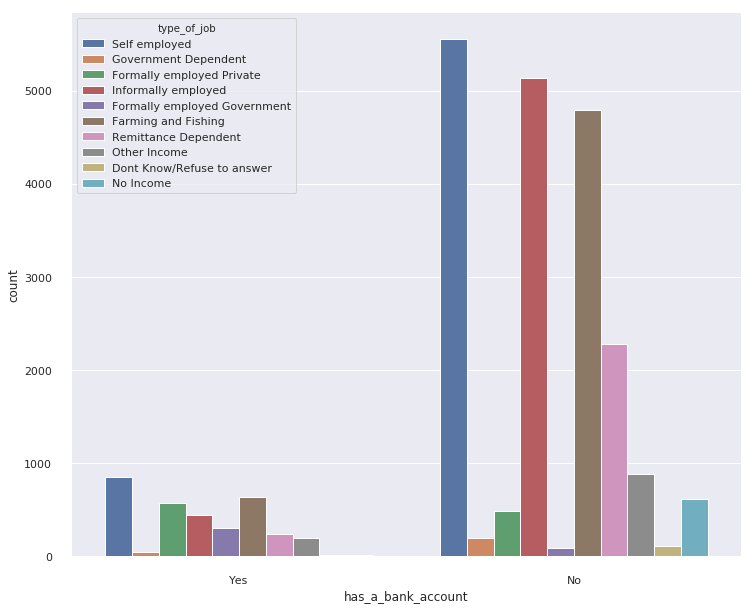

In [0]:
#graph between having a bank account and type of jom
# set the background colour of the plot to white
sns.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(12,10)})
# create a countplot
sns.countplot('has_a_bank_account',data=economic,hue = 'type_of_job')
# Remove the top and down margin
sns.despine(offset=10, trim=True)

In [0]:
#most self employed individuals do not have a bank account
#most formally employed private individuals do have a bank account

In [0]:
a = economic.groupby(['gender_of_respondent', 'has_a_bank_account'])['has_a_bank_account'].count().sort_values(ascending = True)
print(a)

gender_of_respondent  has_a_bank_account
Female                Yes                    1482
Male                  Yes                    1822
                      No                     7792
Female                No                    12355
Name: has_a_bank_account, dtype: int64


In [0]:
#most females do not have a bank account compared to males who most have a bank account

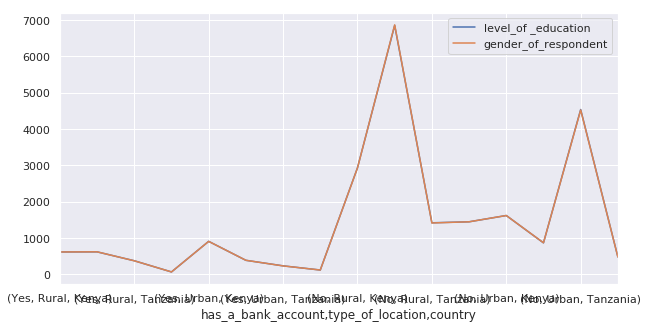

In [0]:
economic.groupby([ 'has_a_bank_account','type_of_location','country'])['level_of _education','gender_of_respondent'].count().sort_values(by=['has_a_bank_account'], ascending = False).plot(kind= 'line', figsize = (10,5))

In [0]:
#most urban individials have a bank account except for Tanzania while most rural individuals do not have a bank account except for Tanzania again

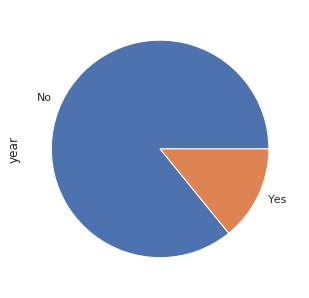

In [0]:
#plotting a histrogram

economicac = neweconomic.groupby(['has_a_bank_account'])['year'].sum().plot(kind= 'pie', figsize = (10,5))
#ax = economicac.sort_values(by = 'country', ascending = False).plot(kind= 'bar', figsize = (18,5))

economicac


In [0]:
neweconomic.columns

Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'level_of _education', 'type_of_job'],
      dtype='object')

In [0]:
#converting columns with female or male values to  variables to 0


neweconomic['gender_of_respondent'] = neweconomic.gender_of_respondent.map({'Female':0, 'Male':1})

In [25]:

neweconomic.gender_of_respondent.unique()

array([0, 1])

In [0]:
#converting columns with yes or no values to their respective variables to dummy variables
neweconomic['has_a_bank_account'] = neweconomic.has_a_bank_account.map({'Yes':0, 'No':1})

In [27]:
neweconomic.has_a_bank_account.unique()

array([0, 1])

In [0]:
neweconomic['cell_phone_access'] = neweconomic.cell_phone_access.map({'Yes':0, 'No':1})

In [33]:
neweconomic.cell_phone_access.unique()

array([0, 1])

In [34]:
# Get dummies so as to concert the categorical variables into numerical variables
dummy = pd.get_dummies(neweconomic, prefix_sep='_', drop_first=True)
# X head
dummy.head()

,year,has_a_bank_account,cell_phone_access,household_size,respondent_age,gender_of_respondent,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Urban,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of _education_No formal education,level_of _education_Other/Dont know/RTA,level_of _education_Primary education,level_of _education_Secondary education,level_of _education_Tertiary education,level_of _education_Vocational/Specialised training,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,2018,0,0,3.0,24.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,2018,1,1,5.0,70.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,0,0,5.0,26.0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,2018,1,0,5.0,34.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,1,1,8.0,26.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [35]:
dummy.describe()

,year,has_a_bank_account,cell_phone_access,household_size,respondent_age,gender_of_respondent,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Urban,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of _education_No formal education,level_of _education_Other/Dont know/RTA,level_of _education_Primary education,level_of _education_Secondary education,level_of _education_Tertiary education,level_of _education_Vocational/Specialised training,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
count,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.00000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000
mean,2016.977464,0.858783,0.257455,3.688560,38.807069,0.410197,0.372022,0.278492,0.089760,0.388903,0.545373,0.008098,0.028363,0.045801,0.277207,0.000343,0.458355,0.33856,0.114953,0.191388,0.000343,0.543616,0.180206,0.048972,0.034319,0.232305,0.016538,0.044859,0.010583,0.237746,0.026478,0.046144,0.107455,0.272536
std,0.849136,0.348253,0.437241,2.281275,16.519905,0.491880,0.483355,0.448266,0.285844,0.487512,0.497948,0.089624,0.166012,0.209058,0.447629,0.018511,0.498273,0.47323,0.318972,0.393402,0.018511,0.498105,0.384367,0.215814,0.182051,0.422312,0.127536,0.206998,0.102329,0.425712,0.160556,0.209801,0.309698,0.445274
min,2016.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,1.000000,0.000000,2.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017.000000,1.000000,0.000000,3.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2018.000000,1.000000,1.000000,5.000000,49.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2018.000000,1.000000,1.000000,21.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


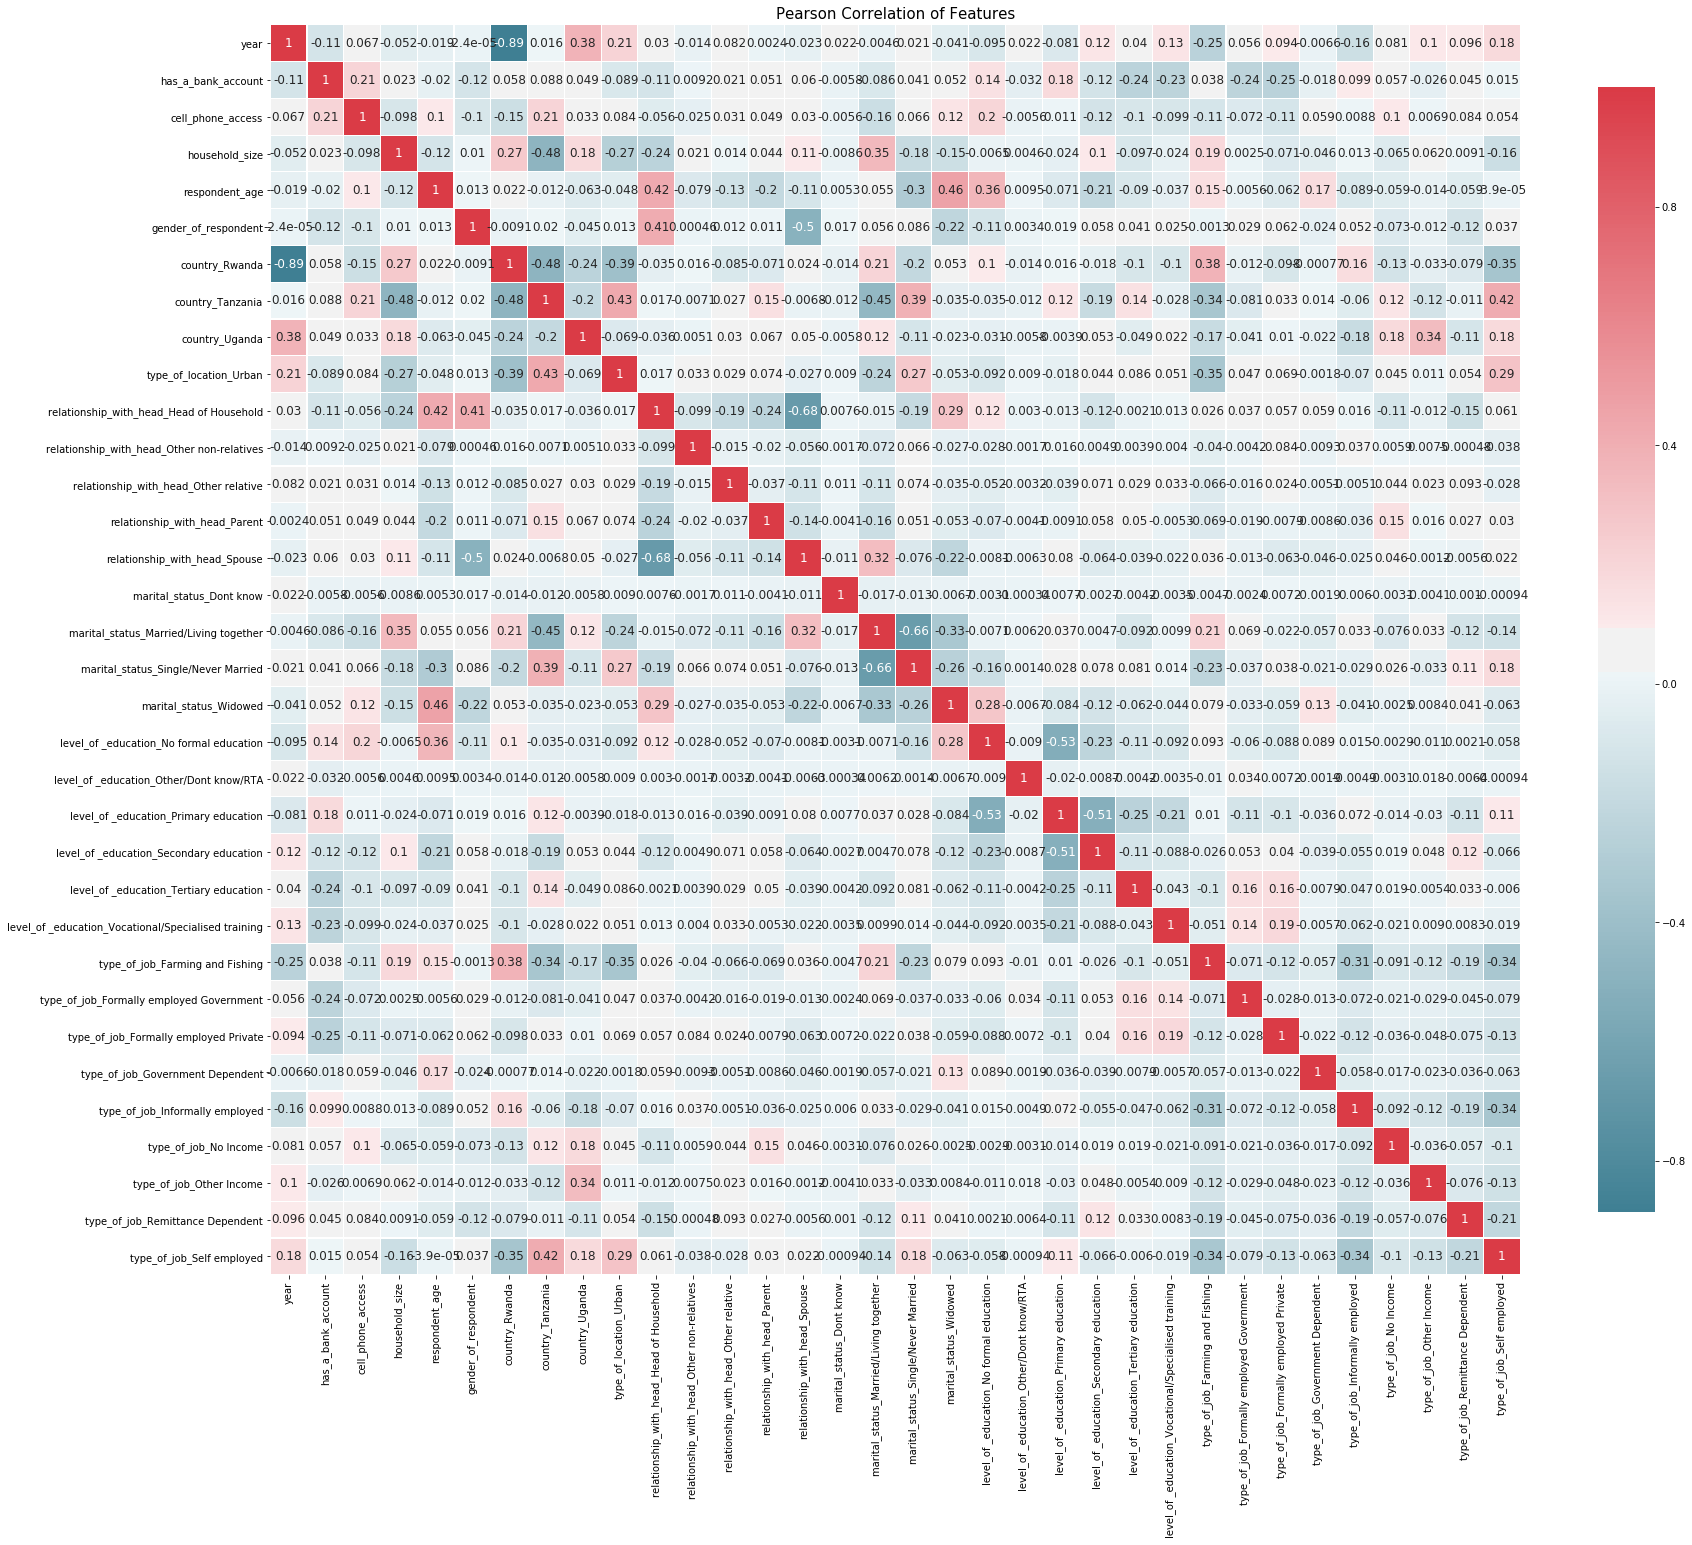

In [40]:
# Checking for correlation and ploting the summaries and recording our observations

def correlation_heatmap(dummy):
   _ , ax = plt.subplots(figsize =(28, 23))
   colormap = sns.diverging_palette(220, 10, as_cmap = True)
   _ = sns.heatmap(
       dummy.corr(),
       cmap = colormap,
       square=True,
       cbar_kws={'shrink':.9 },
       ax=ax,
       annot=True,
       linewidths=0.1,vmax=1.0, linecolor='white',
       annot_kws={'fontsize':12 }
   )
   plt.title('Pearson Correlation of Features', y=1.05, size=15)
correlation_heatmap(dummy)

plt.savefig("correlation.png")



In [0]:
# Crossplots to show the relationships between the variables
sns.pairplot(dummy, diag_kind = 'kde')


#plt.figure(figsize=(14, 14))

In [41]:
# Finding the minimum and maximum age values 
agemax = neweconomic["respondent_age"].max()
agemin = neweconomic["respondent_age"].min()

# Calculating the range
agemax - agemin


84.0

In [0]:
from scipy import stats
from scipy.stats import ttest_1samp
import researchpy as rp

In [0]:
dummy.columns

In [43]:
#replacing ' '(space) with '_'
dummy.columns = dummy.columns.str.strip().str.replace(' ','_')
dummy.columns

Index(['year', 'has_a_bank_account', 'cell_phone_access', 'household_size',
       'respondent_age', 'gender_of_respondent', 'country_Rwanda',
       'country_Tanzania', 'country_Uganda', 'type_of_location_Urban',
       'relationship_with_head_Head_of_Household',
       'relationship_with_head_Other_non-relatives',
       'relationship_with_head_Other_relative',
       'relationship_with_head_Parent', 'relationship_with_head_Spouse',
       'marital_status_Dont_know', 'marital_status_Married/Living_together',
       'marital_status_Single/Never_Married', 'marital_status_Widowed',
       'level_of__education_No_formal_education',
       'level_of__education_Other/Dont_know/RTA',
       'level_of__education_Primary_education',
       'level_of__education_Secondary_education',
       'level_of__education_Tertiary_education',
       'level_of__education_Vocational/Specialised_training',
       'type_of_job_Farming_and_Fishing',
       'type_of_job_Formally_employed_Government',
       'ty

In [44]:
dummy.groupby('type_of_job_Formally_employed_Private')['has_a_bank_account'].describe()
rp.summary_cont(dummy.groupby("type_of_job_Formally_employed_Private")['has_a_bank_account'])

,N,Mean,SD,SE,95% Conf.,Interval
type_of_job_Formally_employed_Private,,,,,,
0,22293,0.877540,0.327824,0.002196,0.873237,0.881844
1,1047,0.459408,0.498588,0.015409,0.429192,0.489623


## Multivariate Analysis

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [46]:
cols = [col for col in dummy.columns if col not in ['has_a_bank_account','year']]
# dropping the 'has bank account' so as to set as the target
data = dummy[cols]
#assigning the has a bank account column as target
target = dummy['has_a_bank_account']
data.head(n=2)

,cell_phone_access,household_size,respondent_age,gender_of_respondent,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Urban,relationship_with_head_Head_of_Household,relationship_with_head_Other_non-relatives,relationship_with_head_Other_relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Dont_know,marital_status_Married/Living_together,marital_status_Single/Never_Married,marital_status_Widowed,level_of__education_No_formal_education,level_of__education_Other/Dont_know/RTA,level_of__education_Primary_education,level_of__education_Secondary_education,level_of__education_Tertiary_education,level_of__education_Vocational/Specialised_training,type_of_job_Farming_and_Fishing,type_of_job_Formally_employed_Government,type_of_job_Formally_employed_Private,type_of_job_Government_Dependent,type_of_job_Informally_employed,type_of_job_No_Income,type_of_job_Other_Income,type_of_job_Remittance_Dependent,type_of_job_Self_employed
0,0,3.0,24.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,5.0,70.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [0]:
#import the necessary module
from sklearn.model_selection import train_test_split
#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 0)

In [62]:
#for loop will check for accuracy in all components
components = {}
for i in np.arange(1, len(X.columns)+1):
  X = dummy.drop(['has_a_bank_account','year'], 1)
  y = dummy['has_a_bank_account']
  # Splitting the dataset into the Training set and Test set
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
  # Standardising the data
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  # Applying PCA
  from sklearn.decomposition import PCA
  pca = PCA(n_components = 10)
  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)
  # Training and Making Predictions
  # The random forest classification classifier has been used to make predictions.
  from sklearn.linear_model import LogisticRegression
  classifier = LogisticRegression(random_state = 0)
  classifier.fit(X_train, y_train)
  # Predicting the Test set results
  y_pred = classifier.predict(X_test)
  # Performing evaluation
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import accuracy_score
  cm = confusion_matrix(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)
  print(cm)
  print(acc)

components.update({'n_components ' + str(i) : 'accuracy ' + str(acc*100)})
components


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 229  577]
 [  96 4933]]
0.8846615252784918
[[ 225  581]
 [  96 4933]]
0.8839760068551842


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 229  577]
 [  96 4933]]
0.8846615252784918
[[ 227  579]
 [  92 4937]]
0.8850042844901457


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 231  575]
 [  95 4934]]
0.8851756640959726
[[ 224  582]
 [  88 4941]]
0.8851756640959726


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 230  576]
 [  98 4931]]
0.8844901456726649
[[ 231  575]
 [  95 4934]]
0.8851756640959726


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 231  575]
 [  96 4933]]
0.8850042844901457
[[ 226  580]
 [  93 4936]]
0.8846615252784918


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 229  577]
 [  95 4934]]
0.8848329048843188
[[ 225  581]
 [  97 4932]]
0.8838046272493574


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 228  578]
 [  92 4937]]
0.8851756640959726
[[ 230  576]
 [  94 4935]]
0.8851756640959726


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 231  575]
 [  95 4934]]
0.8851756640959726
[[ 228  578]
 [  96 4933]]
0.8844901456726649


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 231  575]
 [  97 4932]]
0.8848329048843188
[[ 231  575]
 [  96 4933]]
0.8850042844901457


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 230  576]
 [  95 4934]]
0.8850042844901457
[[ 231  575]
 [  94 4935]]
0.8853470437017995


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 230  576]
 [  95 4934]]
0.8850042844901457
[[ 233  573]
 [  95 4934]]
0.8855184233076264


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 235  571]
 [  99 4930]]
0.8851756640959726
[[ 229  577]
 [  94 4935]]
0.8850042844901457


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 231  575]
 [  94 4935]]
0.8853470437017995
[[ 231  575]
 [  94 4935]]
0.8853470437017995


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 231  575]
 [  94 4935]]
0.8853470437017995
[[ 230  576]
 [  95 4934]]
0.8850042844901457


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 230  576]
 [  97 4932]]
0.8846615252784918
[[ 227  579]
 [  94 4935]]
0.8846615252784918


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 230  576]
 [  95 4934]]
0.8850042844901457
[[ 231  575]
 [  94 4935]]
0.8853470437017995


{'n_components 32': 'accuracy 88.53470437017995'}

In [0]:
#usinl Multiple Regression Analysis: linear regression for my prediction
lm = LinearRegression()
results = lm.fit(X_train,y_train)

In [64]:
# Grabbing predictions off the test set and see how well it did
# ---
predictions = lm.predict(X_test)
predictions

array([0.8744085 , 0.91932516, 0.83261617, ..., 1.06538701, 0.78621873,
       0.87840228])

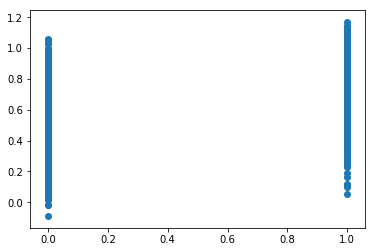

In [65]:
# visualising the prediction
# ---
plt.scatter(y_test,predictions)

In [66]:
r2_score(y_test, predictions)

0.23526549104994632

In [67]:
(lm.coef_, lm.intercept_)

(array([-1.49216287e-05, -7.78060042e-04,  7.52456342e-02, -3.22219257e-02,
        -3.91291395e-02, -8.58091463e-02, -5.77607340e-03, -2.65657346e-02,
        -3.92891126e-03,  1.75672644e-02]), 0.8577549271636675)

In [68]:
X2 = sm.add_constant(X.values)  
model = sm.OLS(y, X2).fit()  
print(model.summary())
#consider removing the variable relationship with head as the value is greater than the p value 0.05.

                            OLS Regression Results                            
Dep. Variable:     has_a_bank_account   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     261.3
Date:                Tue, 13 Aug 2019   Prob (F-statistic):               0.00
Time:                        06:41:57   Log-Likelihood:                -4920.3
No. Observations:               23340   AIC:                             9907.
Df Residuals:                   23307   BIC:                         1.017e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8406      0.065     12.887      0.0

In [0]:
##consider removing the variable relationship with head as the value is greater than the p value 0.05.
#from the results above variables with values greater than 0.05. 

In [70]:
#removing values with p value greater than 0.05

#for loop will check for accuracy in all components

#for loop will check for accuracy in all components
components = {}
for i in np.arange(1, len(X.columns)+1):
  X = dummy.drop(['has_a_bank_account','year','relationship_with_head_Other_non-relatives','relationship_with_head_Other_relative',
                  'relationship_with_head_Parent','marital_status_Dont_know','marital_status_Single/Never_Married', 'marital_status_Widowed',
                  'level_of__education_Primary_education','level_of__education_Secondary_education','type_of_job_Government_Dependent',
                  'type_of_job_No_Income','type_of_job_Other_Income','type_of_job_Self_employed'], 1)
  y = dummy['has_a_bank_account']
  # Splitting the dataset into the Training set and Test set
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
  # Standardising the data
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  # Applying PCA
  from sklearn.decomposition import PCA
  pca = PCA(n_components = 10)
  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)
  # Training and Making Predictions
  # The random forest classification classifier has been used to make predictions.
  from sklearn.linear_model import LogisticRegression
  classifier = LogisticRegression(random_state = 0)
  classifier.fit(X_train, y_train)
  # Predicting the Test set results
  y_pred = classifier.predict(X_test)
  # Performing evaluation
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import accuracy_score
  cm = confusion_matrix(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)
  print(cm)
  print(acc)

components.update({'n_components ' + str(i) : 'accuracy ' + str(acc*100)})
components

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 210  596]
 [  80 4949]]
0.8841473864610111
[[ 210  596]
 [  80 4949]]
0.8841473864610111


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 210  596]
 [  80 4949]]
0.8841473864610111
[[ 210  596]
 [  80 4949]]
0.8841473864610111


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 210  596]
 [  80 4949]]
0.8841473864610111
[[ 210  596]
 [  80 4949]]
0.8841473864610111


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 210  596]
 [  80 4949]]
0.8841473864610111
[[ 210  596]
 [  80 4949]]
0.8841473864610111


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 210  596]
 [  80 4949]]
0.8841473864610111
[[ 210  596]
 [  80 4949]]
0.8841473864610111


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 210  596]
 [  80 4949]]
0.8841473864610111
[[ 210  596]
 [  80 4949]]
0.8841473864610111


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 210  596]
 [  80 4949]]
0.8841473864610111
[[ 210  596]
 [  80 4949]]
0.8841473864610111


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 210  596]
 [  80 4949]]
0.8841473864610111
[[ 210  596]
 [  80 4949]]
0.8841473864610111


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 210  596]
 [  80 4949]]
0.8841473864610111
[[ 210  596]
 [  80 4949]]
0.8841473864610111


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 210  596]
 [  80 4949]]
0.8841473864610111
[[ 210  596]
 [  80 4949]]
0.8841473864610111


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 210  596]
 [  80 4949]]
0.8841473864610111
[[ 210  596]
 [  80 4949]]
0.8841473864610111


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 210  596]
 [  80 4949]]
0.8841473864610111
[[ 210  596]
 [  80 4949]]
0.8841473864610111


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 210  596]
 [  80 4949]]
0.8841473864610111
[[ 210  596]
 [  80 4949]]
0.8841473864610111


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 210  596]
 [  80 4949]]
0.8841473864610111
[[ 210  596]
 [  80 4949]]
0.8841473864610111


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 210  596]
 [  80 4949]]
0.8841473864610111
[[ 210  596]
 [  80 4949]]
0.8841473864610111


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 210  596]
 [  80 4949]]
0.8841473864610111
[[ 210  596]
 [  80 4949]]
0.8841473864610111


{'n_components 32': 'accuracy 88.41473864610111'}

In [0]:
#usinl Multiple Regression Analysis: linear regression for my prediction
lm = LinearRegression()
results = lm.fit(X_train,y_train)

In [73]:
# Grabbing predictions off the test set and see how well it did
# ---
predictions = lm.predict(X_test)
predictions

array([0.87231191, 0.90510937, 0.88804108, ..., 1.04320808, 0.84681589,
       0.85995189])

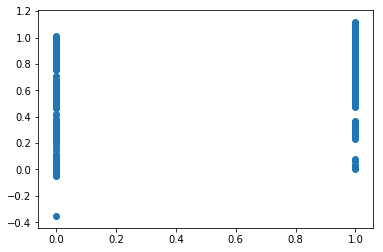

In [74]:
# visualising the prediction
# ---
plt.scatter(y_test,predictions)

In [75]:
r2_score(y_test, predictions)

0.22894618516073706

In [76]:
(lm.coef_, lm.intercept_)

(array([ 0.00982792,  0.02301282, -0.09422767, -0.03583045,  0.05506237,
        -0.04950873, -0.03092222, -0.00249094,  0.00602533, -0.03166346]),
 0.8577549271636675)

In [77]:
X2 = sm.add_constant(X.values)  
model = sm.OLS(y, X2).fit()  
print(model.summary())
#from the results, these are the variables that would best predict the most likely individual to open a bank account.

                            OLS Regression Results                            
Dep. Variable:     has_a_bank_account   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     388.7
Date:                Tue, 13 Aug 2019   Prob (F-statistic):               0.00
Time:                        07:46:35   Log-Likelihood:                -5140.3
No. Observations:               23340   AIC:                         1.032e+04
Df Residuals:                   23319   BIC:                         1.049e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8610      0.011     81.952      0.0

The following variables predict the individual most likely to open a bank account:

cell_phone_access
household_size
respondent_age
gender_of_respondent
type_of_location_Urban
relationship_with_head_Head_of_Household
relationship_with_head_Spouse
marital_status_Married/Living_together
level_of__education_No_formal_education
level_of__education_Other/Dont_know/RTA
level_of__education_Tertiary_education
level_of__education_Vocational/Specialised_training
type_of_job_Farming_and_Fishing
type_of_job_Formally_employed_Government
type_of_job_Formally_employed_Private
type_of_job_Informally_employed






